# Introduction 
This project has anayzed data from the dating app OKCupid. Dating apps are relatively new and have a rich user base. These apps are a rich source user data new relations can be found through data analysis and machine learning 


**Data sources:**
The data set used, `profiles.csv`, was provided by Codecademy.com.

## Scoping
### Project Goals
Probably the most interesting data from such an app would be the matching choices by the users. However, since this wasn'in the data, the focus has been on whether one could predicts the income by the other variables. Since a lot of users have not stated their income and one would want to know it anyway, these models could be used to make a prediction yourself.  
A second goal is to predict whether someone smokes or not. In this data set 90.81% of the smoker/non-smoker values were present and can be used to predict the last 9.19%. 

### Data
The project uses one data set, which is provided by Codecademy called `profiles.csv`. In the data, each row represents an OkCupid user and the columns are the responses to their user profiles which include multi-choice and short answer questions.

### Analysis 
This analysis will first focus on how the indivisual features are distributed and will later be prepared for several different machine learning models to predict income and whether someone smokes or not. The models include neural networks, multiple linear regression, support vector machine, random forest and logistic regression. 

### Evaluation
Each model will be subjected to evaluation, to determine which one predicts the best. The models predicting income, which is an continous variable will be evaluated by the mean average error.

The output of the models predicing smoker/non-smoker, which is a binary variable, will be evaluated through a confusion matrix and classification metrics accuracy, precision, recall, F1 score. 

## Loading the Data

In [515]:
import pandas as pd
data = pd.read_csv("profiles.csv")

### Data Characteristics

Let's take a first glance at the data, to have an impression how the data set is structured.

In [518]:
data.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


### Explore the Data 

The columns in the dataset include: 

- **age:** continuous variable of age of user
- **body_type:** categorical variable of body type of user
- **diet:** categorical variable of dietary information
- **drinks:**  categorical variable of alcohol consumption
- **drugs:** categorical variable of drug usage
- **education:** categorical variable of educational attainment
- **ethnicity:** categorical variable of ethnic backgrounds
- **height:** continuous variable of height of user
- **income:** continuous variable of income of user
- **job:** categorical variable of employment description
- **offspring:** categorical variable of children status
- **orientation:** categorical variable of sexual orientation
- **pets:** categorical variable of pet preferences
- **religion:** categorical variable of religious background
- **sex:** categorical variable of gender
- **sign:** categorical variable of astrological symbol
- **smokes:** categorical variable of smoking consumption
- **speaks:** categorical variable of language spoken
- **status:** categorical variable of relationship status
- **last_online:** date variable of last login
- **location:** categorical variable of user locations

And a set of open short-answer responses to :

- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if…


The data types seem right. However, there are a lot of null values.

In [522]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [523]:
for col in data.columns:
        non_null_percentage = data[col].count()/59946
        print(f"{col}: {non_null_percentage:.2%} {'non-null values'} ")

age: 100.00% non-null values 
body_type: 91.17% non-null values 
diet: 59.31% non-null values 
drinks: 95.02% non-null values 
drugs: 76.51% non-null values 
education: 88.94% non-null values 
essay0: 90.85% non-null values 
essay1: 87.37% non-null values 
essay2: 83.92% non-null values 
essay3: 80.86% non-null values 
essay4: 82.42% non-null values 
essay5: 81.90% non-null values 
essay6: 77.03% non-null values 
essay7: 79.23% non-null values 
essay8: 67.93% non-null values 
essay9: 78.98% non-null values 
ethnicity: 90.52% non-null values 
height: 99.99% non-null values 
income: 100.00% non-null values 
job: 86.32% non-null values 
last_online: 100.00% non-null values 
location: 100.00% non-null values 
offspring: 40.68% non-null values 
orientation: 100.00% non-null values 
pets: 66.77% non-null values 
religion: 66.26% non-null values 
sex: 100.00% non-null values 
sign: 81.56% non-null values 
smokes: 90.81% non-null values 
speaks: 99.92% non-null values 
status: 100.00% non-null

# Continous Variables

### Age
The plot shows that the data is skewed to the right, with a center at around late 20s.

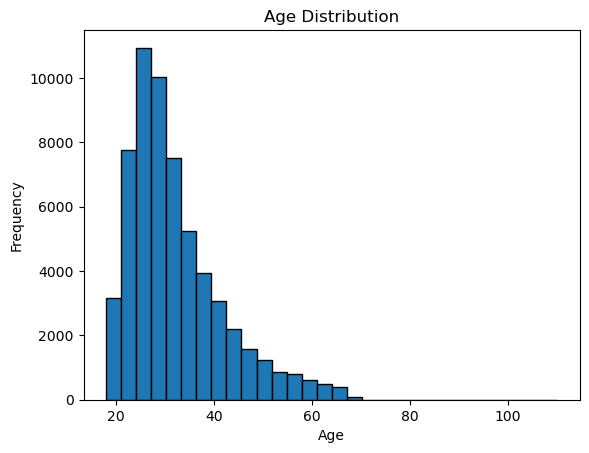

In [526]:
# Plot histogram
import matplotlib.pyplot as plt
data['age'].plot(kind='hist', bins=30, edgecolor='black')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Income

In [528]:
data.income.describe()

count      59946.000000
mean       20033.222534
std        97346.192104
min           -1.000000
25%           -1.000000
50%           -1.000000
75%           -1.000000
max      1000000.000000
Name: income, dtype: float64

In [529]:
data.income.isnull().any()

False

Although there are no null-values for the variable 'income', there are lot of values with '0', as can be seen in the graph below. To let this variable have any prediction value, these values must be removed.

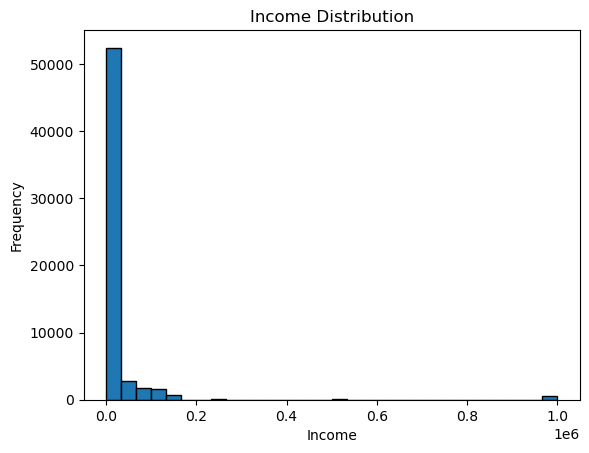

In [531]:

# Plot histogram
data['income'].plot(kind='hist', bins=30, edgecolor='black')

plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

# Discrete Variables

### Job

In [534]:
data.job.value_counts()

job
other                                7589
student                              4882
science / tech / engineering         4848
computer / hardware / software       4709
artistic / musical / writer          4439
sales / marketing / biz dev          4391
medicine / health                    3680
education / academia                 3513
executive / management               2373
banking / financial / real estate    2266
entertainment / media                2250
law / legal services                 1381
hospitality / travel                 1364
construction / craftsmanship         1021
clerical / administrative             805
political / government                708
rather not say                        436
transportation                        366
unemployed                            273
retired                               250
military                              204
Name: count, dtype: int64

### Sex

In [536]:
data.sex.value_counts()

sex
m    35829
f    24117
Name: count, dtype: int64

In [537]:
data.sex.value_counts(normalize=True)

sex
m    0.597688
f    0.402312
Name: proportion, dtype: float64

40% of the users were female, while 60% were male.

### Body_type

In [540]:
data.body_type.value_counts()

body_type
average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: count, dtype: int64

### Diet

In [542]:
data.diet.value_counts()

diet
mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly halal            18
strictly kosher           18
halal                     11
kosher                    11
Name: count, dtype: int64

### Drugs

In [544]:
data.drugs.value_counts()

drugs
never        37724
sometimes     7732
often          410
Name: count, dtype: int64

### Drinks

In [546]:
data.drinks.value_counts()

drinks
socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: count, dtype: int64

### Education

In [548]:
data.education.value_counts()

education
graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out of ph.d program            127
d

- There are a lot of unclear variables in here, such as "masters program" vs "working on masters program" vs. "graduated from masters program".  
- Also "space camp" seems like an odd variable to me, maybe people filles this in as a joke.   
- I think that "dropped out of ph.d program" could be classifierd as "graduated from masters program".

In this research, these variables will remained untouched. However, for a more thorough model, one could clean these a bit more.

### Religion

In [551]:
data.religion.value_counts()

religion
agnosticism                                   2724
other                                         2691
agnosticism but not too serious about it      2636
agnosticism and laughing about it             2496
catholicism but not too serious about it      2318
atheism                                       2175
other and laughing about it                   2119
atheism and laughing about it                 2074
christianity                                  1957
christianity but not too serious about it     1952
other but not too serious about it            1554
judaism but not too serious about it          1517
atheism but not too serious about it          1318
catholicism                                   1064
christianity and somewhat serious about it     927
atheism and somewhat serious about it          848
other and somewhat serious about it            846
catholicism and laughing about it              726
judaism and laughing about it                  681
buddhism but not too s

This feature gives as many unique values and will not be included in the analysis.

### Essay columns

In [554]:
data.essay0.nunique()

54350

All the values in the essay variables are amost all unique and will therfore not be included in the analysis.

# Data preperation

Calculating null-values per variable.

In [558]:
for col in data.columns:
    if col in ['job', 'age', 'sex', 'income', 'smokes', 'offspring', 'body_type', 'diet','drugs', 'drinks','education']:
        non_null_percentage = data[col].count()/59946
        print(f"{col}: {non_null_percentage:.2%}")


age: 100.00%
body_type: 91.17%
diet: 59.31%
drinks: 95.02%
drugs: 76.51%
education: 88.94%
income: 100.00%
job: 86.32%
offspring: 40.68%
sex: 100.00%
smokes: 90.81%


Diet and offspring will be removed from the features, because they have too many null-values. 

# Preprocessing 

In [561]:
income_above_0 = data[data['income'] > 0 ]
len(income_above_0)

11504

With there 0 values removed, let's take a look at the newly formed bar chart.

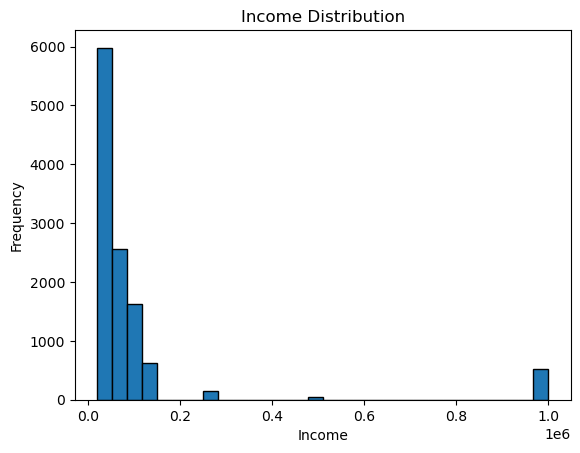

In [563]:
# Plot histogram
income_above_0['income'].plot(kind='hist', bins=30, edgecolor='black')

plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

In [564]:
income_above_0['income'].describe()

count      11504.000000
mean      104394.993046
std       201433.528307
min        20000.000000
25%        20000.000000
50%        50000.000000
75%       100000.000000
max      1000000.000000
Name: income, dtype: float64

In [565]:
income_above_0['income'][income_above_0['income'] == 1000000].count()

521

In [566]:
521/11504

0.045288595271210014

This means that 4.5% would have an income of 1.000.000, while between 500.000 and 1.000.000 there were none. This seems rather unlikely, so these values will be removed. There were also very few values between 150,000 and up. To improve the model I have also removed these and capped the income at 100,000.

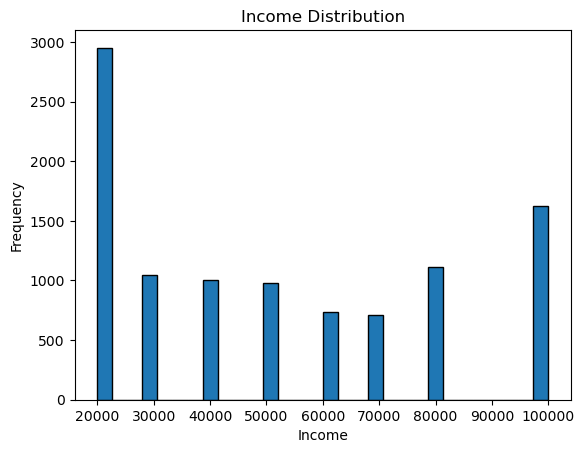

In [568]:
income_above_0_below_100k = income_above_0[income_above_0['income'] <= 100000]
# Plot histogram
income_above_0_below_100k['income'].plot(kind='hist', bins=30, edgecolor='black')

plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

In [569]:
income_above_0_below_100k['income'].describe()

count     10155.000000
mean      51606.105367
std       29033.245262
min       20000.000000
25%       20000.000000
50%       50000.000000
75%       80000.000000
max      100000.000000
Name: income, dtype: float64

## One-hot encoding

In [571]:
data_select = income_above_0_below_100k[['job', 'age', 'sex', 'income', 'smokes', 'body_type', 'drugs', 'drinks','education']]
data_cleaned = data_select.dropna()

data_one_hot_encoded = pd.get_dummies(
    data_cleaned,
    columns = ['job', 'sex', 'smokes', 'body_type', 'drugs','drinks', 'education'], 
    dtype = int
)

print(f"{len(income_above_0_below_100k)} or {round(len(income_above_0_below_100k)/len(data)*100,2)}% of orginal values remain after removing incomes ")
print(f" {len(data_one_hot_encoded)} or {round(len(data_one_hot_encoded)/len(data)*100,2)}% of orginal values remain after removing null-values of selected columns ")

10155 or 16.94% of orginal values remain after removing incomes 
 7375 or 12.3% of orginal values remain after removing null-values of selected columns 


Eventhough a lot of variables were removed due to null-values, 7375 records should still be sufficient to make a model.

### Correlations between each variable and income

It can be seen that 'age', 'job_student' and 'education_working on college/university' have the strongest correlation with income. The latter two are one hot encoded variables from the original variable 'job'. These variables will have the strongest predicting power in the machine learning models.

In [575]:
# Calculate correlation matrix for all columns
corr_matrix = data_one_hot_encoded.corr()

# Extract correlations of all features with the target column
corr_with_target = corr_matrix['income'].drop('income')  # drop self-correlation

# Sort correlations by absolute value descending
corr_with_target_sorted = corr_with_target.abs().sort_values(ascending=False)

print(corr_with_target_sorted.head(20))
print(corr_with_target_sorted.tail(20))

age                                            0.371337
job_student                                    0.328826
education_working on college/university        0.316385
job_computer / hardware / software             0.277395
education_graduated from masters program       0.261862
job_science / tech / engineering               0.227512
education_graduated from college/university    0.219512
smokes_no                                      0.196594
drugs_never                                    0.187773
education_working on two-year college          0.176040
drugs_sometimes                                0.166286
job_executive / management                     0.156001
job_other                                      0.153004
sex_m                                          0.144315
sex_f                                          0.144315
smokes_yes                                     0.144043
education_graduated from high school           0.141394
body_type_athletic                             0

# Analysis 

## Predicting income

To predict one's income the following variables will be used: ''job', 'age', 'sex', 'income', 'smokes', 'body_type', 'drugs', 'drinks', 'education'. Although I expected that education, job, age and sex were the biggest predictors, the model became significant more accurate when I added the other variarables, so I decided to keep them in.

### Using neural network regression

Selecting columns from data set.

In [581]:
X_col_list = [col for col in data_one_hot_encoded.columns if col != 'income']
y_col_list = ['income']

Scaling y values.

In [583]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = data_one_hot_encoded[X_col_list]
y_scaled = scaler.fit_transform(data_one_hot_encoded[y_col_list])

Creating tensors

In [585]:
import torch
X_tensor = torch.tensor(X.values, dtype = torch.float)
y_tensor = torch.tensor(y_scaled, dtype = torch.float)

Splitting data.

In [587]:
from sklearn.model_selection import train_test_split
X_tensor_train, X_tensor_test, y_tensor_train, y_tensor_test = train_test_split(X_tensor, y_tensor, test_size = 0.2)

Checking shapes of the X and y values. The amount of nodes in the model will be adjusted to this.

In [589]:
X_tensor_train.shape

torch.Size([5900, 81])

In [590]:
X_tensor_test.shape

torch.Size([1475, 81])

In [591]:
y_tensor_train.shape

torch.Size([5900, 1])

In [592]:
y_tensor_test.shape

torch.Size([1475, 1])

Since there are 81 feature and 1 target value (income), the model will start with 81 nodes and end with 1.

Running the model, calculating the Mean Squared Error Loss.

In [595]:
#Using Mean Squared Error losss
from torch import nn
import torch.optim as optim
from torch.nn import MSELoss
from sklearn.metrics import accuracy_score, recall_score, precision_score
import torch.optim as optim

nn_regmodel = nn.Sequential(
    nn.Linear(81,81),
    nn.ReLU(),
    nn.Linear(81,40),
    nn.ReLU(),
    nn.Linear(40,20),
    nn.ReLU(),
    nn.Linear(20,1)
)

loss = MSELoss()
optimizer = optim.Adam(nn_regmodel.parameters(), lr= 0.05)

num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    predictions = nn_regmodel(X_tensor_train)
    MSE = loss(predictions, y_tensor_train)
    

    MSE.backward()
    optimizer.step()

     
    if (epoch + 1) % 100 == 0:

        print(f'Epoch [{epoch+1}/{num_epochs}], MSELoss: {MSE.item():.4f}')




Epoch [100/1000], MSELoss: 0.4726
Epoch [200/1000], MSELoss: 0.4483
Epoch [300/1000], MSELoss: 0.4432
Epoch [400/1000], MSELoss: 0.4680
Epoch [500/1000], MSELoss: 0.4463
Epoch [600/1000], MSELoss: 0.4431
Epoch [700/1000], MSELoss: 0.4420
Epoch [800/1000], MSELoss: 0.4408
Epoch [900/1000], MSELoss: 0.4386
Epoch [1000/1000], MSELoss: 0.4395


In [596]:
torch.save(nn_regmodel, 'nn_regression_y_scaled_cleaned')

Evaluating the model.

In [598]:
#Evaluating
nn_regression_y_scaled = torch.load('nn_regression_y_scaled_cleaned', weights_only=False)
MAEloss = nn.L1Loss()
MSEloss = MSELoss()

#Calculating the Mean Average Error
nn_regression_y_scaled.eval()
with torch.no_grad():
    predictions = nn_regression_y_scaled(X_tensor_test)
    test_MAE = MAEloss(predictions, y_tensor_test)

#Calculating the Mean Squared Error
nn_regression_y_scaled.eval()
with torch.no_grad():
    predictions = nn_regression_y_scaled(X_tensor_test)
    test_MSE = MSEloss(predictions, y_tensor_test)

#Taking the root for interpretability
import math
test_RMSE = math.sqrt(test_MSE) 

print(test_MAE)
print(test_RMSE)

tensor(0.5049)
0.6704505191441091


In [599]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Suppose y is a 1D NumPy array or Series
y = data_one_hot_encoded [y_col_list].values.reshape(-1, 1)  # ensure it's 2D

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)  # now scaler_y is fitted!

# Now this will work:
mae_original = 0.6947 * scaler_y.scale_[0]
rmse_original = 0.9789 * scaler_y.scale_[0]

print(f"MAE (original scale): {mae_original:.2f}")
print(f"RMSE (original scale): {rmse_original:.2f}")



MAE (original scale): 20151.34
RMSE (original scale): 28395.20


A mean average error of 20,151.34 and a root mean squared error of 28,385 with a data set with the minimum of 20,000 and a maximum of 100,000 isn't that good. I wonder how a simpler multiple linear regression would do. 

### Predicting income by multiple linear regression

In [602]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = data_one_hot_encoded[X_col_list]
y = data_one_hot_encoded[y_col_list]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 5)
lm = LinearRegression()

lm.fit(X_train, y_train)

print(round(lm.score(X_train, y_train),2))
print(round(lm.score(X_test, y_test),2))

0.51
0.54


With an R*2 of 0.54, expaining 54% of the variance, this model would be considered a moderately good, usable model.

In [604]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


X = data_one_hot_encoded [X_col_list]
y = data_one_hot_encoded [y_col_list]

#Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2)

#Train model
lm = LinearRegression()
lm.fit(X_train, y_train)

#Make predictions on train data
predictions = lm.predict(X_train)

#Calculate loss on train data
loss_train = mean_absolute_error(y_train, predictions)

#Make predictions on test data
predictions = lm.predict(X_test)

#Calculate loss on test data
loss_test = mean_absolute_error(y_test, predictions)

#print results
print(loss_train)
print(loss_test)
print(lm.score(X_train, y_train))
print(lm.score(X_test, y_test))

15893.976158072393
16293.805320310254
0.5211381834055595
0.48757433257029126


This model has an average loss of 16,426.25, which is not great, but already lot better than the neural network.


## Predicting smokers and non-smokers 

### Label encoding and one-hot encoding

In [608]:
data_select['smokes'].value_counts(normalize=True)

smokes
no                0.734259
sometimes         0.090021
when drinking     0.070165
yes               0.063786
trying to quit    0.041770
Name: proportion, dtype: float64

I assign all the smoker values, from 'yes', 'sometimes', 'when drinking' and 'trying to quit' to '1' and the value 'no' to '0'.

In [610]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [611]:
smoke_data_select = income_above_0_below_100k[['job', 'age', 'sex', 'income', 'smokes', 'body_type','drugs', 'drinks','education']]

smoke_data_cleaned = smoke_data_select.dropna()

smoke_one_hot_encoded = pd.get_dummies(
    smoke_data_cleaned,
    columns = ['job', 'sex', 'body_type', 'drugs', 'drinks','education'], # I could manually code the values for drink and drug frequency
    dtype = int
)
smoke_one_hot_encoded['smokes'] = smoke_one_hot_encoded['smokes'].replace({'yes': 1, 'trying to quit':1, 'sometimes': 1, 'when drinking': 1, 'no':0})

C:\Users\Frank\AppData\Local\Temp\ipykernel_4304\1301782267.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  smoke_one_hot_encoded['smokes'] = smoke_one_hot_encoded['smokes'].replace({'yes': 1, 'trying to quit':1, 'sometimes': 1, 'when drinking': 1, 'no':0})


In [612]:
smoke_one_hot_encoded['smokes'].value_counts(normalize=True)

smokes
0    0.749153
1    0.250847
Name: proportion, dtype: float64

### Neural network

#### Selecting columns, splitting data.

In [615]:
X_col_list = [col for col in smoke_one_hot_encoded.columns if col != 'smokes']
y_col_list = ['smokes']

nn_bin_X = smoke_one_hot_encoded[X_col_list]
nn_bin_y= smoke_one_hot_encoded[y_col_list]

In [616]:
X_tensor = torch.tensor(nn_bin_X.values, dtype = torch.float)
y_tensor = torch.tensor(nn_bin_y.values, dtype = torch.float)

In [617]:
nn_bin_X_train, nn_bin_X_test, nn_bin_y_train, nn_bin_y_test = train_test_split(X_tensor, y_tensor, test_size = 0.2)

#### Checking the shape to determine the amount of nodes per layer.

In [619]:
nn_bin_y.shape

(7375, 1)

In [620]:
nn_bin_X.shape

(7375, 77)

I will be using weighted classes, to prevent the model from only predicting non-smokers (which is 73,4%).

In [622]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

X = nn_bin_X_train
y = nn_bin_y_train

# Define the model
nn_bin_classifier = nn.Sequential(
    nn.Linear(77, 77),
    nn.ReLU(),
    nn.Linear(77, 38),
    nn.ReLU(),
    nn.Linear(38, 1)
)

# Compute correct class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.array([0.0, 1.0]),
    y=y.numpy().ravel()
)
pos_weight = torch.tensor([class_weights[1]], dtype=torch.float32)

# Define loss with correct pos_weight
loss_fn = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

# Use Adam optimizer
optimizer = optim.Adam(nn_bin_classifier.parameters(), lr=0.001)

# Training loop
num_epochs = 5000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    logits = nn_bin_classifier(X).squeeze()
    loss = loss_fn(logits, y.squeeze())
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

# Check predictions after training
with torch.no_grad():
    probs = torch.sigmoid(nn_bin_classifier(X).squeeze())
    preds = (probs >= 0.5).float()
    print(f"Predicted Positives: {preds.sum().item()}")
    print(f"Actual Positives: {y.sum().item()}")


Epoch 100/5000, Loss: 24.6397
Epoch 200/5000, Loss: 9.0546
Epoch 300/5000, Loss: 10.2887
Epoch 400/5000, Loss: 2.6498
Epoch 500/5000, Loss: 7.4273
Epoch 600/5000, Loss: 6.8937
Epoch 700/5000, Loss: 2.6149
Epoch 800/5000, Loss: 6.4712
Epoch 900/5000, Loss: 11.0464
Epoch 1000/5000, Loss: 11.8120
Epoch 1100/5000, Loss: 10.0973
Epoch 1200/5000, Loss: 6.2600
Epoch 1300/5000, Loss: 1.9901
Epoch 1400/5000, Loss: 1.6636
Epoch 1500/5000, Loss: 3.1286
Epoch 1600/5000, Loss: 4.0651
Epoch 1700/5000, Loss: 2.2913
Epoch 1800/5000, Loss: 2.0700
Epoch 1900/5000, Loss: 2.1059
Epoch 2000/5000, Loss: 2.1376
Epoch 2100/5000, Loss: 2.1607
Epoch 2200/5000, Loss: 2.1756
Epoch 2300/5000, Loss: 2.1831
Epoch 2400/5000, Loss: 2.1835
Epoch 2500/5000, Loss: 2.1777
Epoch 2600/5000, Loss: 2.1663
Epoch 2700/5000, Loss: 2.1500
Epoch 2800/5000, Loss: 2.1294
Epoch 2900/5000, Loss: 2.1050
Epoch 3000/5000, Loss: 2.0777
Epoch 3100/5000, Loss: 2.0477
Epoch 3200/5000, Loss: 2.0158
Epoch 3300/5000, Loss: 1.9822
Epoch 3400/500

#### Saving the model 

Saving the model, so I don't have to run it every time when I want to run all the cels above the selected one.

In [625]:
#torch.save(nn_bin_classifier, 'nn_bin_classifier')

In [626]:
### Evaluating.

In [627]:
# Set model to eval mode
nn_bin_classifier.eval()

with torch.no_grad():
    y_logits = nn_bin_classifier(nn_bin_X_test)
    y_probs = torch.sigmoid(y_logits)              # Convert logits to probabilities
    y_pred = (y_probs >= 0.5).float()               # Convert to binary labels (0 or 1)


mask = ~torch.isnan(nn_bin_y_test).squeeze()
nn_bin_y_test = nn_bin_y_test[mask]

y_true = nn_bin_y_test.cpu().numpy()
y_pred = y_pred.cpu().numpy()

In [628]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, zero_division=0)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1 Score:  {f1:.3f}")


Accuracy:  0.764
Precision: 0.620
Recall:    0.167
F1 Score:  0.263


I have used weighted classes, to prevent the model from only predicting non-smokers (which is 73,4%). How it's accuracy is still 76,4%, but the F1 score is a lot higher (0.263 instead of 0). 
Also I have tweaked the learning rate to get as much of a accuracy and a F1 score as possible. 

### Support Vector Machine

In [632]:
from sklearn.svm import SVC

In [633]:
X_train, X_val, y_train, y_val = train_test_split(nn_bin_X, nn_bin_y)
print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)

(5531, 77) (1844, 77) (5531, 1) (1844, 1)


In [634]:
X_train = X_train  # Get the values directly from the DataFrame
y = y_train.values.ravel()  # Convert DataFrame to numpy array, then to 1D array

svm_model = SVC(class_weight='balanced', C=100, gamma = 0.1)
svm_model.fit(X_train, y)

SVC(C=100, class_weight='balanced', gamma=0.1)

In [635]:
X_values = X_val.values  # Get the values directly from the DataFrame
y_values = y_val.values.ravel()  # Convert DataFrame to numpy array, then to 1D array

svm_model.score(X_val, y_val)

0.7066160520607375

In [636]:
y_pred = svm_model.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
cm

array([[1124,  267],
       [ 274,  179]], dtype=int64)

This means that the model predicted:  
- 1143 true negative values,  
- 242 false positive values,  
- 277 false negative values,  
- 182 true positive values.  

In [638]:
y_true  = y_val
y_pred = svm_model.predict(X_val)


acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, zero_division=0)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1 Score:  {f1:.3f}")

Accuracy:  0.707
Precision: 0.401
Recall:    0.395
F1 Score:  0.398


This score is a bit worse than the neural network.

### Random Forest Classifier

In [641]:
data_select = income_above_0_below_100k[['job', 'age', 'sex', 'income', 'smokes', 'body_type', 'drugs', 'drinks','education']]
data_select = data_select.dropna()

In [642]:
X_col_list = [col for col in data_select.columns if col != 'smokes']
y_col_list = 'smokes'

In [643]:
X_forest = data_select[X_col_list]
y_forest = data_select[y_col_list]

In [644]:
X_f_train, X_f_val, y_f_train, y_f_val = train_test_split(nn_bin_X, nn_bin_y)

In [645]:
from sklearn.ensemble import RandomForestClassifier

f_classifier = RandomForestClassifier(n_estimators=400)
f_classifier.fit(X_f_train, y_f_train.values.ravel()) ## moet X_train en y betere namen geven
print(f_classifier.score(X_f_val, y_f_val.values.ravel()))



0.764642082429501


#### Determining how many trees gives the highest accuracy.

In [647]:
# score = 0


# for trees in range(2500, 3001):
#     if trees % 100 == 0:
#         f_classifier = RandomForestClassifier(n_estimators=trees)
#         f_classifier.fit(X_f_train, y_f_train.values.ravel()) # ravel is used to make the y values into a 1D shape. 
#         new_score = f_classifier.score(X_f_val, y_f_val.values.ravel())
#     if new_score > score:
#         score = new_score
#         best_trees = trees

# print(round(score,2), trees)

3000 trees were the optimum amount to get the highest score. The score of a model determines its accuracy, so it is still not sure what will give the highest F1 score.

In [649]:
trees = 3000

  
f_classifier = RandomForestClassifier(n_estimators=3000)
f_classifier.fit(X_f_train, y_f_train.values.ravel()) # ravel is used to make the y values into a 1D shape. 
score = f_classifier.score(X_f_val, y_f_val.values.ravel())

print(round(score,2), trees)

0.76 3000


In [650]:
# f1 = 0


# for trees in range(500, 3001):
#     if trees % 100 == 0:
#         f_classifier = RandomForestClassifier(n_estimators=trees)
#         f_classifier.fit(X_f_train, y_f_train.values.ravel()) # ravel is used to make the y values into a 1D shape. 
#         y_true  = y_f_val
#         y_pred = f_classifier.predict(X_f_val)
#         acc = accuracy_score(y_true, y_pred)
#         prec = precision_score(y_true, y_pred, zero_division=0)
#         rec = recall_score(y_true, y_pred)
#         new_f1 = f1_score(y_true, y_pred)
#     if new_f1 > f1:
#         f1 = new_f1
#         best_trees = trees

# print(round(f1,2), trees)

It appears that increasing the number of trees leads to a higher F1 score.

In [652]:
#X_f_val

In [653]:
y_f_pred = f_classifier.predict(X_f_val)
cm = confusion_matrix(y_f_val, y_f_pred)
cm

array([[1261,  121],
       [ 314,  148]], dtype=int64)

This means that the model predicted:  
- 1257 true negative values,  
- 133 false positive values,  
- 287 false negative values,  
- 157 true positive values.  

In [655]:
y_true  = y_f_train
y_pred = f_classifier.predict(X_f_train)

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, zero_division=0)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1 Score:  {f1:.3f}")

Accuracy:  0.990
Precision: 0.988
Recall:    0.970
F1 Score:  0.979


The model is very well trained on the training data and has a very high accuracy and F1 score. However, the real test lies at the test data.

In [657]:
y_true  = y_f_val
y_pred = f_classifier.predict(X_f_val)

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, zero_division=0)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1 Score:  {f1:.3f}")

Accuracy:  0.764
Precision: 0.550
Recall:    0.320
F1 Score:  0.405


The Accuracy and F1 score are about the same of the Support Vector Machine and the neural network.  

### Logistic Regression

The final model that will be used to predict whether someone smokes or not is a logistic regression.

In [661]:
X_l_train, X_l_val, y_l_train, y_l_val = train_test_split(nn_bin_X, nn_bin_y)

In [662]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

cc_lr = LogisticRegression(max_iter=10000)
cc_lr.fit(X_l_train, y_l_train.values.ravel())

y_pred = cc_lr.predict(X_l_val)
y_true = y_l_val.values.ravel()

print(confusion_matrix(y_true, y_pred))

[[1293   96]
 [ 293  162]]


This means that the model predicted:  
- 1268 true negative values,  
- 86 false positive values,  
- 348 false negative values,  
- 142 true positive values.  

In [664]:
y_true  = y_l_val
y_pred = cc_lr.predict(X_l_val)

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, zero_division=0)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1 Score:  {f1:.3f}")

Accuracy:  0.789
Precision: 0.628
Recall:    0.356
F1 Score:  0.454


The accuracy of this model is about the same as the other ones, however the F1 score is a lot lower, making this the worst model for the job.

# Results

### Income
To predict income a neural network was used, as well as a multiple linear regression model. The mean average error A mean average error of the models were:
- **Neural network:** 20,151.34  
- **Multiple linear regression:** 16,426.25

Both MAE's are pretty bad predictors, since the value range from 20,000 to 100,000. The mutlipe linear regression model did outperform the neural network and would be best for this data set to predict one's income.  
  
### Smoker/non-smoker
To predict if one smokes a neural network, a support vector machine, a random forest classifier and a logistic regression model were used. The evaluation metrics are shown below:  

**Neural Network:**   
Accuracy:  0.764
Precision: 0.620
Recall:    0.167
F1 Score:  0.263  

**SVM:**  
Accuracy:  0.707
Precision: 0.401
Recall:    0.395
F1 Score:  0.398

**Random Forest Classifier:**  
Accuracy:  0.764
Precision: 0.550
Recall:    0.320
F1 Score:  0.405

**Logistic Regression:**  
Accuracy:  0.789
Precision: 0.628
Recall:    0.356
F1 Score:  0.454


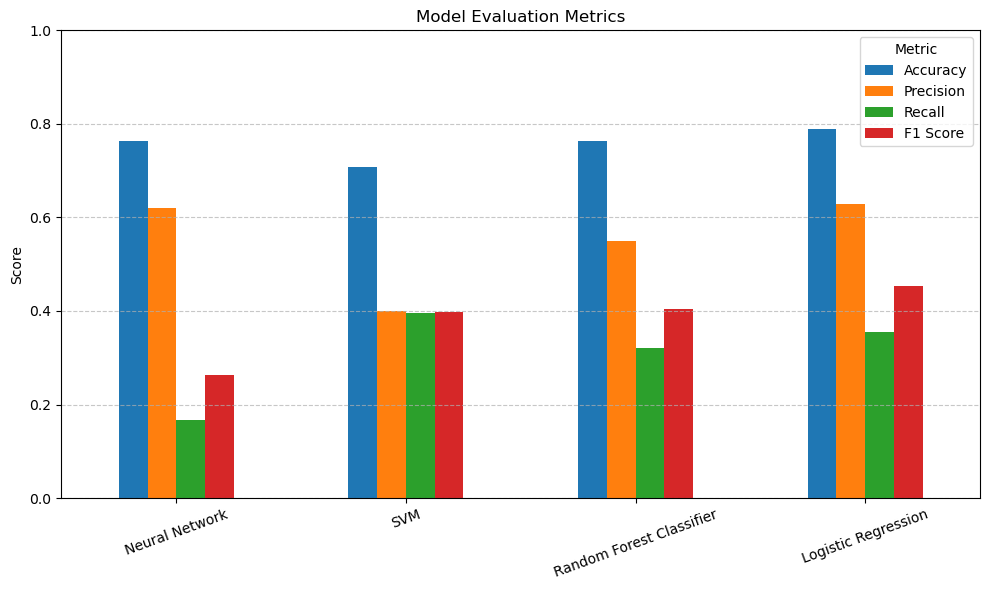

In [757]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
models = ['Neural Network', 'SVM', 'Random Forest Classifier', 'Logistic Regression']

data = {
    'Neural Network':       [0.764, 0.620, 0.167, 0.263],
    'SVM':                  [0.707, 0.401, 0.395, 0.398],
    'Random Forest Classifier': [0.764, 0.550, 0.320, 0.405],
    'Logistic Regression':  [0.789, 0.628, 0.356, 0.454]
}

# Create DataFrame
df = pd.DataFrame(data, index=metrics)

# Plot
ax = df.T.plot(kind='bar', figsize=(10, 6))
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.legend(title='Metric')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


As can be seen below, the eveluation metrics are devided about the same between each model. They have a high accuracy score, a lower accuracy and an even lower recall and F1 score. The models all have about the same scores, while the logistic regression is going a bit better at every metric.

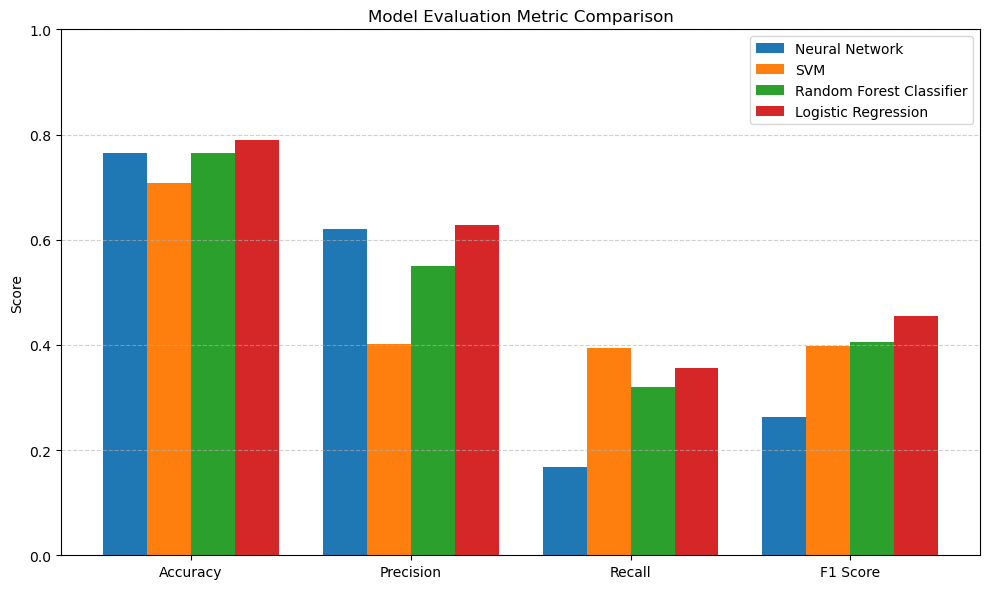

In [759]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
models = ['Neural Network', 'SVM', 'Random Forest Classifier', 'Logistic Regression']

data = {
    'Accuracy':    [0.764, 0.707, 0.764, 0.789],
    'Precision':   [0.620, 0.401, 0.550, 0.628],
    'Recall':      [0.167, 0.395, 0.320, 0.356],
    'F1 Score':    [0.263, 0.398, 0.405, 0.454]
}

# Create DataFrame
df = pd.DataFrame(data, index=models)

# Plot setup
bar_width = 0.2
x = np.arange(len(metrics))  # X locations for the groups

# Plot bars
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * bar_width, df.loc[model], width=bar_width, label=model)

# Formatting
ax.set_xticks(x + bar_width * 1.5)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.set_ylabel("Score")
ax.set_title("Model Evaluation Metric Comparison")
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


# Conclusion

Accurately predicting an individual's income is a challenging task. However, if such a prediction must be made, a simple linear regression model appears to outperform more complex models such as neural networks

When attempting to predict wheter an invidividual is a smoker a logistic regressions is likely the most suitable model. That said, the model's performance—reflected by an F1 score of 0.454—indicates that it is still far from reliable. In practice, a direct inquiry may be a more effective and accurate approach.